# Libraries

In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import mne

plt.rcParams["figure.figsize"] = (20,10)
files = glob.glob('../data/**/*.edf') 

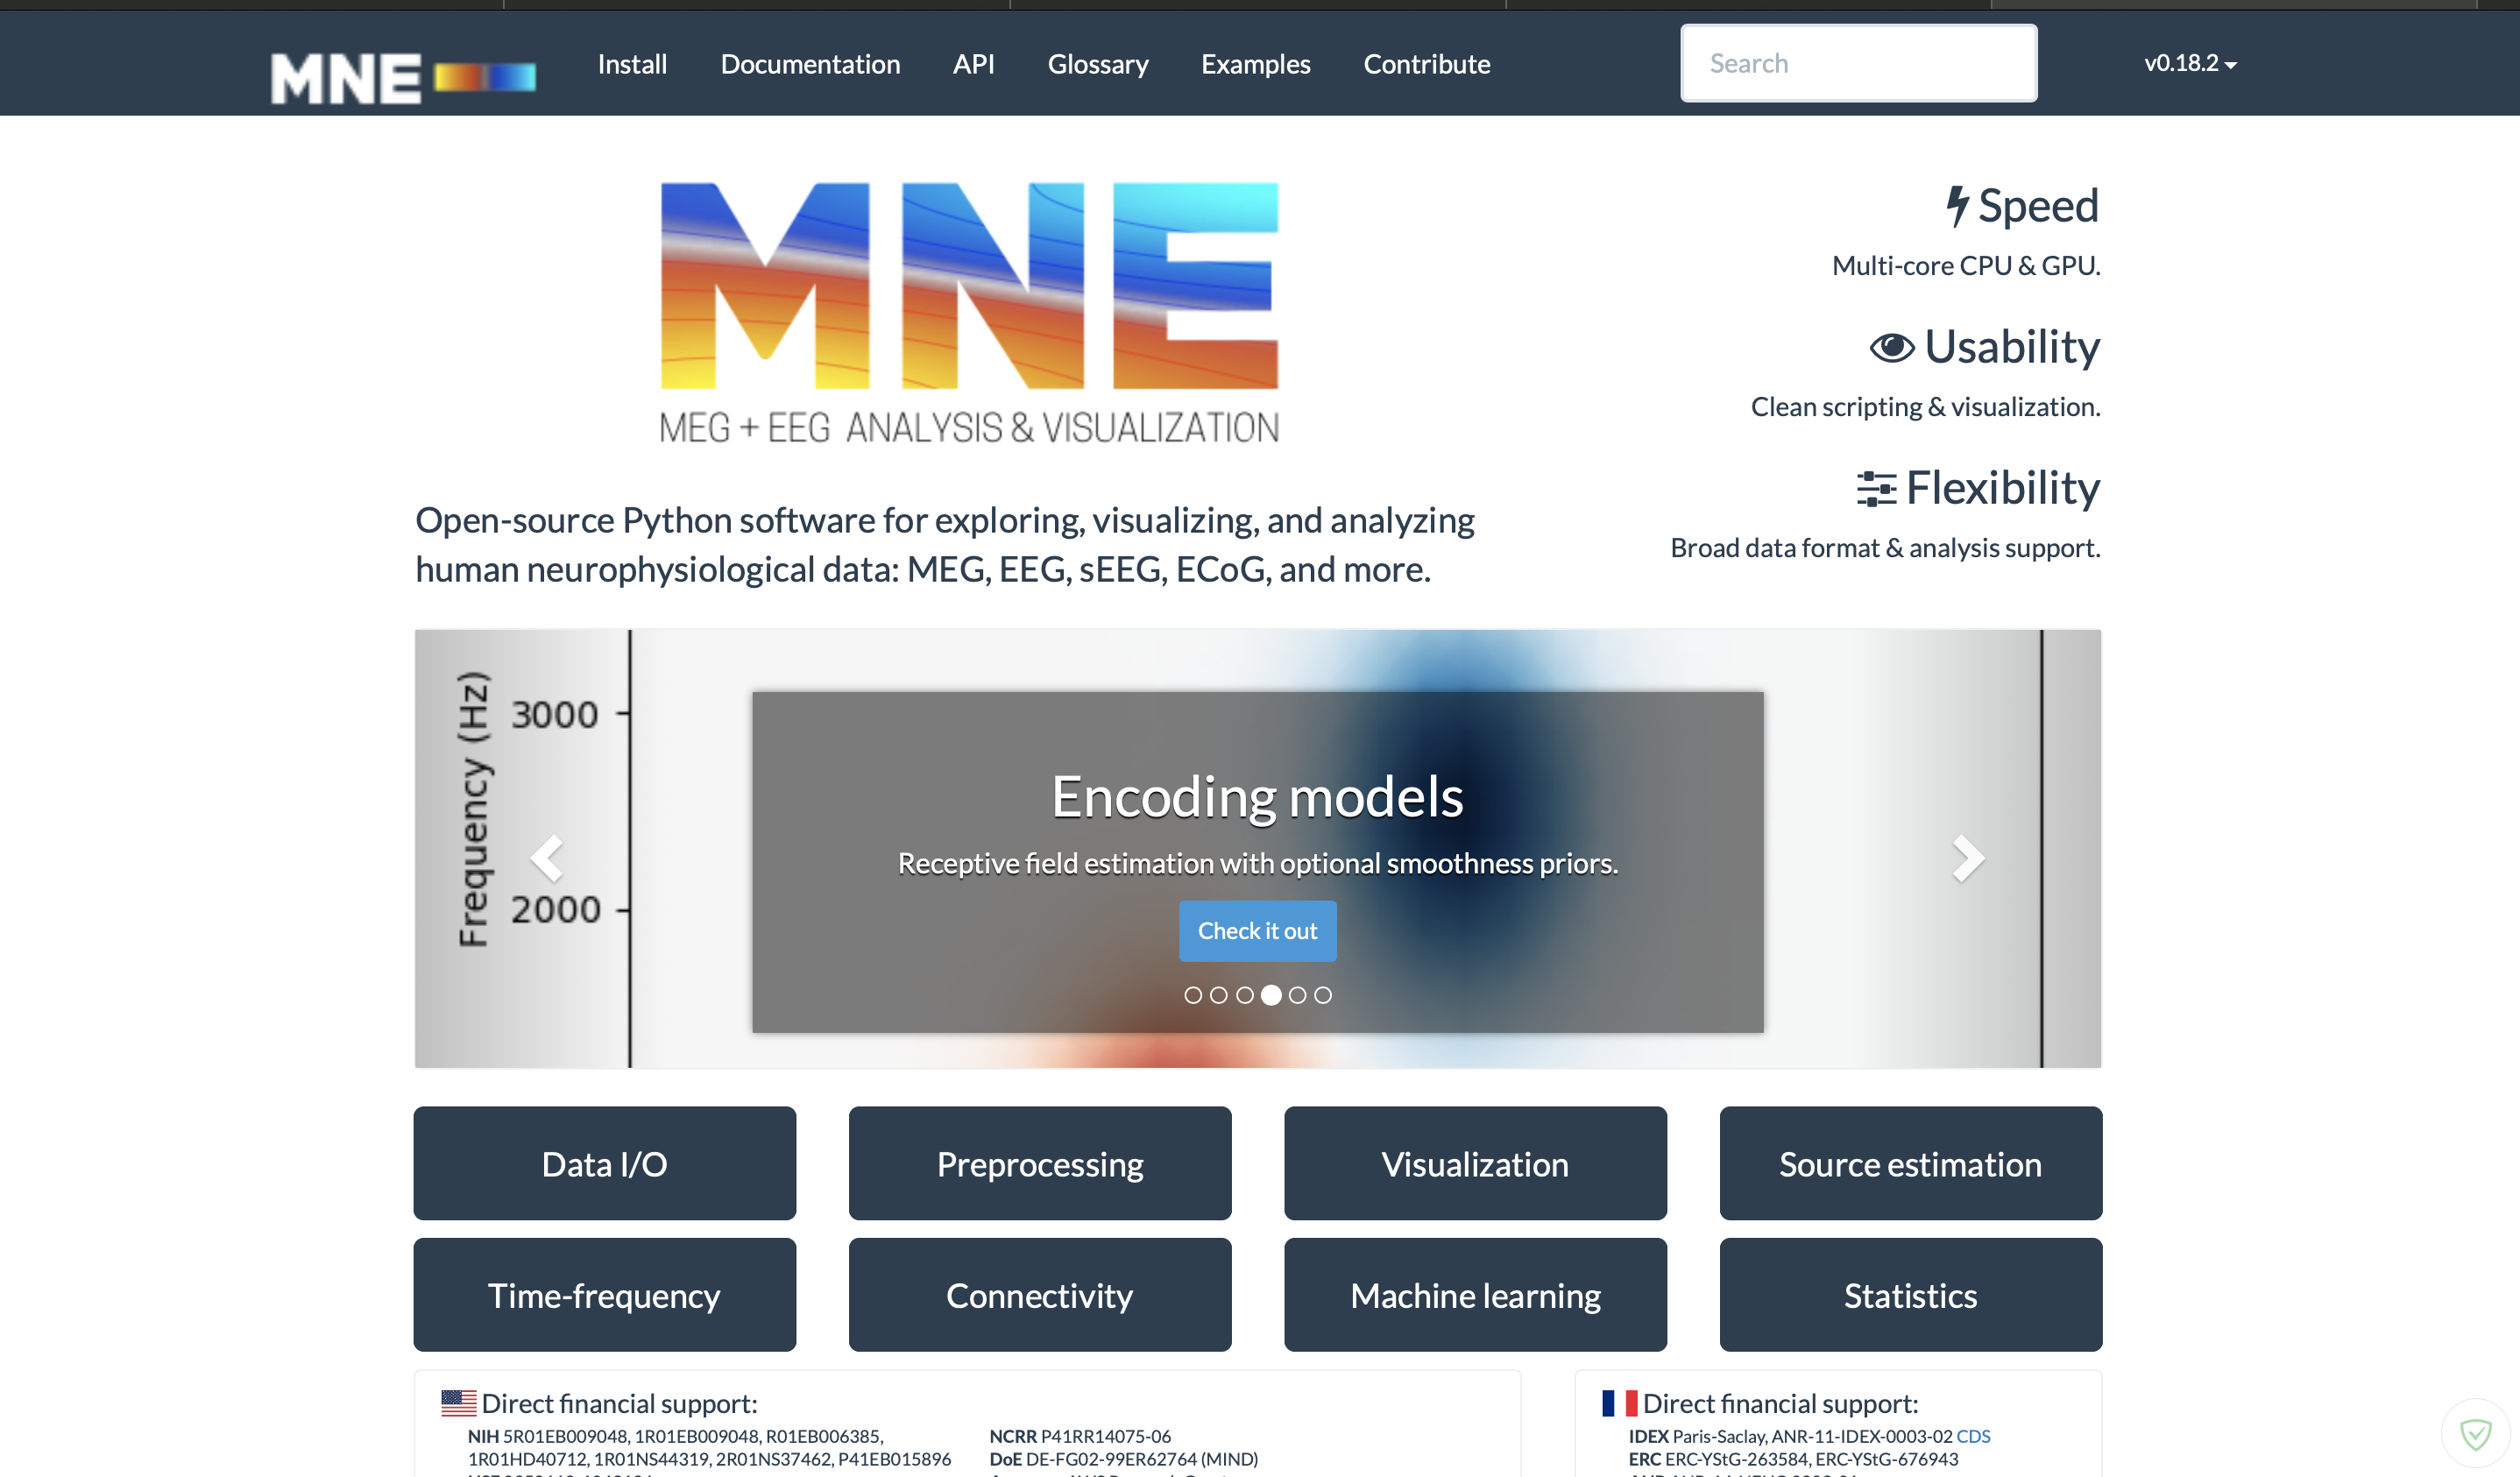

In [2]:
Image(filename="../../images/mne-python.jpg") 

## Listing All the files

In [3]:
file_name = '../data/Utkarsh_shukla_resting.edf'

## Reading Raw Data

In [4]:
read_raw = mne.io.read_raw_edf(file_name,preload=True,verbose=False)
list_of_channes = read_raw.info['ch_names']

In [5]:
read_raw.info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | COUNTER, INTERPOLATED, AF3, F7, F3, FC5, T7, P7, O1, ...
    chs : list | 40 items (EEG: 40)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 64.0 Hz
    meas_date : tuple | 2019-02-19 18:01:58 GMT
    nchan : int | 40
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 128.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_

## To Many Extra Channels

In [6]:
print(list_of_channes)

['COUNTER', 'INTERPOLATED', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'RAW_CQ', 'GYROX', 'GYROY', 'MARKER', 'MARKER_HARDWARE', 'SYNC', 'TIME_STAMP_s', 'TIME_STAMP_ms', 'CQ_AF3', 'CQ_F7', 'CQ_F3', 'CQ_FC5', 'CQ_T7', 'CQ_P7', 'CQ_O1', 'CQ_O2', 'CQ_P8', 'CQ_T8', 'CQ_FC6', 'CQ_F4', 'CQ_F8', 'CQ_AF4', 'CQ_CMS', 'CQ_DRL']


## Take What you Need

In [7]:
read_raw = read_raw.pick_channels( ['AF3','F7','F3','FC5','T7','P7','O1',
                        'O2','P8','T8','FC6','F4','F8','AF4'])

In [8]:
data_subset = read_raw.copy()

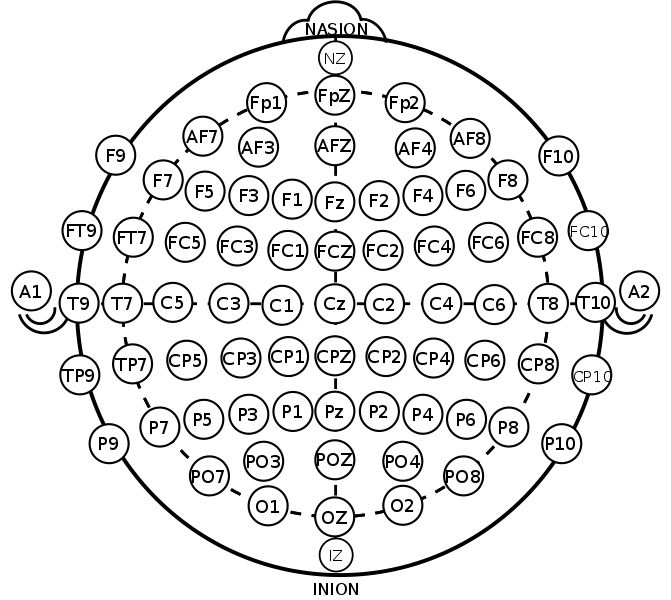

In [9]:
Image(filename="../../images/10-20-system.png" )

## Mapping SIgnal Position to the Electrode Data

In [10]:
# Mapping electrodes to data
montage = mne.channels.read_montage('standard_1020')
data_subset.set_montage(montage,verbose=False)

<RawEDF  |  Utkarsh_shukla_resting.edf, n_channels x n_times : 14 x 15360 (120.0 sec), ~1.7 MB, data loaded>

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 93 unique labels.


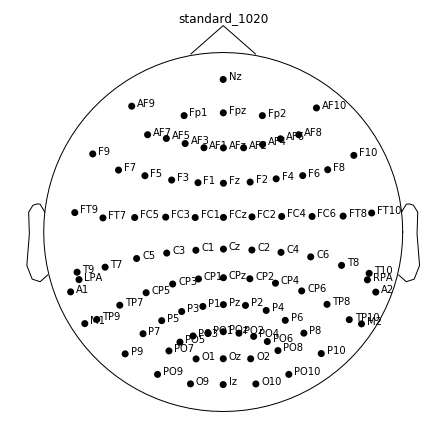

In [11]:
montage.plot()
plt.show()

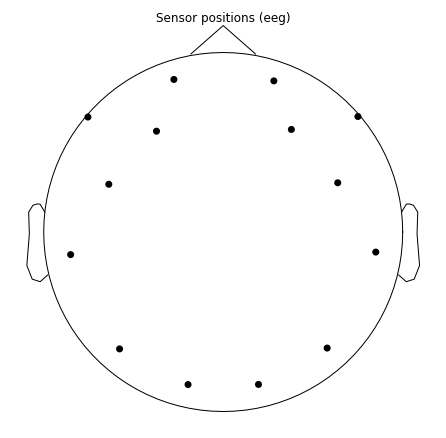

In [12]:
data_subset.plot_sensors()
plt.show()

# How my Brain Waves Look like ???

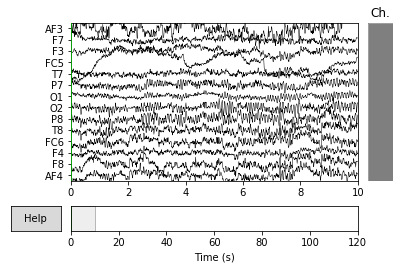

In [13]:
# F7,T7,O2
data_subset.plot()
plt.show()

# Remember frequency Analysis ?

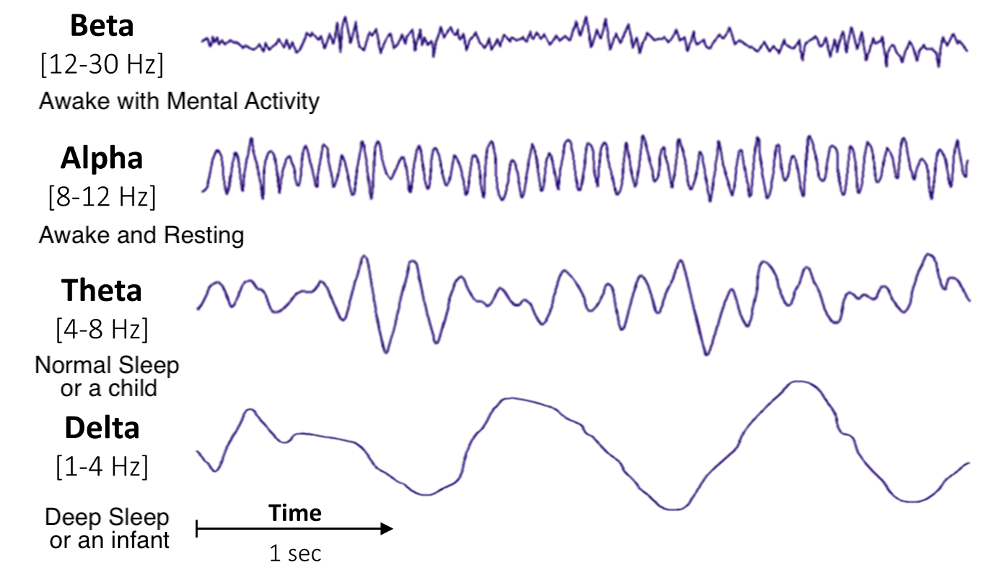

In [14]:
Image(filename='../../images/brain_waves.png')

# Removing Unwanted Frequency

### Doing highpass - lowpass filter using FIR (finite impulse response)

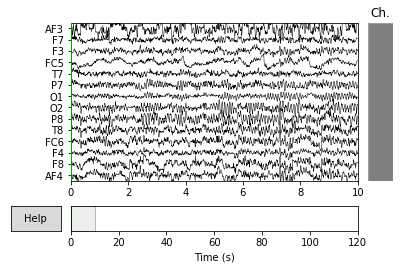

In [15]:
data_subset.filter(1,40.0,fir_design='firwin',verbose=False)
data_subset.plot()
plt.show()

# Getting the Alphas and the Betas

In [16]:
alphas = data_subset.copy()
betas = data_subset.copy()

In [17]:
alphas.filter(8,12.0,fir_design='firwin',verbose=False)
betas.filter(12,30.0,fir_design='firwin',verbose=False)

<RawEDF  |  Utkarsh_shukla_resting.edf, n_channels x n_times : 14 x 15360 (120.0 sec), ~1.7 MB, data loaded>

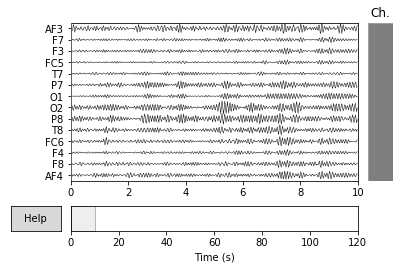

In [18]:
alphas.plot()
plt.show()

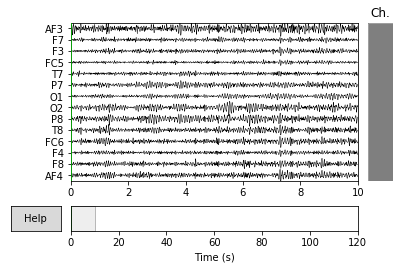

In [19]:
betas.plot()
plt.show()

# Power Assiciated with each frequency

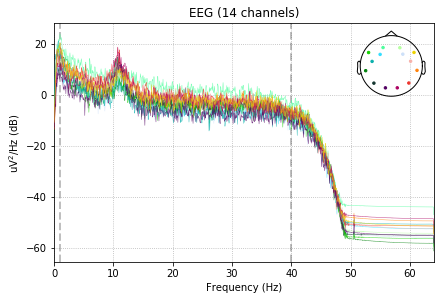

In [20]:
data_subset.plot_psd()
plt.show()

# Indipendent Component Analysis

In [21]:
from mne.preprocessing import ICA
ica = ICA(n_components = 14, random_state = 0).fit(data_subset)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 14 components
Fitting ICA took 1.8s.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


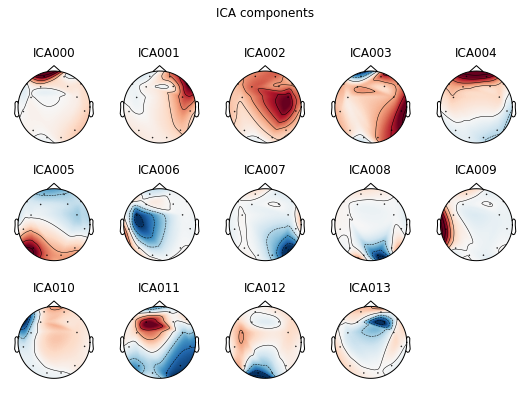

In [22]:
ica.plot_components()
plt.show()

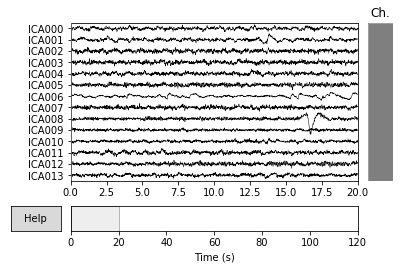

In [23]:
ica.plot_sources(data_subset)
plt.show()

# Artifact Correction

In [24]:
ica.detect_artifacts(data_subset)

    Searching for artifacts...
    found 1 artifact by skewness
    found 1 artifact by kurtosis
    found 1 artifact by variance
Artifact indices found:
    9, 9, 0
    Removing duplicate indices...
Ready.


<ICA  |  raw data decomposition, fit (fastica): 15360 samples, 14 components, channels used: "eeg", 2 sources marked for exclusion>

Transforming to ICA space (14 components)
Zeroing out 2 ICA components


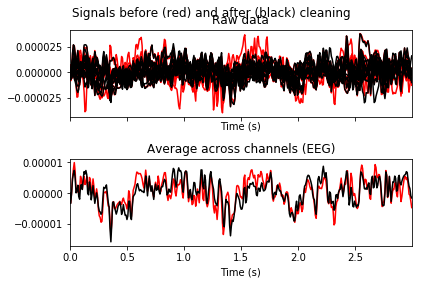

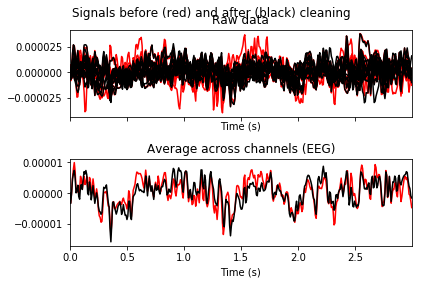

In [25]:
ica.plot_overlay(data_subset)